In [2]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import warnings
from datetime import datetime
!pip install ta
import ta

  Using cached ta-0.11.0.tar.gz (25 kB)
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29429 sha256=77dc4ccc146ecb64d7041e9f8dd87267a3f4f60bbcac663fc11242b172650f11
  Stored in directory: c:\users\nael\appdata\local\pip\cache\wheels\da\13\20\7470524219c7f3f69f64e12cc972f2dc6522c17349365d64b8
Successfully built ta


In [3]:
mt5.initialize()

True

In [4]:
accInfo = mt5.account_info()
print("Login:", accInfo.login)
print("balance: ", accInfo.balance)
print("Run time: ", datetime.now())

Login: 213490216
balance:  5008.77
Run time:  2025-05-12 18:22:11.840741


In [5]:
fromDate = datetime.now()
fromDate

datetime.datetime(2025, 5, 12, 18, 22, 13, 945126)

In [6]:
DataBTCUSD = mt5.copy_ticks_from("BTCUSD", fromDate,10, mt5.COPY_TICKS_ALL)

In [7]:
dfBTCUSD  = pd.DataFrame(DataBTCUSD)
dfBTCUSD["time"] = pd.to_datetime(dfBTCUSD["time"], unit="s")
dfBTCUSD


,time,bid,ask,last,volume,time_msc,flags,volume_real
0,2025-05-12 11:22:13,104282.50,104305.50,0.0,0,1747048933017,6,0.0
1,2025-05-12 11:22:13,104283.29,104306.29,0.0,0,1747048933219,6,0.0
2,2025-05-12 11:22:13,104283.46,104306.46,0.0,0,1747048933321,6,0.0
3,2025-05-12 11:22:13,104283.44,104306.44,0.0,0,1747048933421,6,0.0
4,2025-05-12 11:22:13,104287.25,104310.38,0.0,0,1747048933521,6,0.0
5,2025-05-12 11:22:13,104289.64,104312.64,0.0,0,1747048933620,6,0.0
6,2025-05-12 11:22:13,104287.46,104310.46,0.0,0,1747048933719,6,0.0
7,2025-05-12 11:22:13,104286.81,104309.81,0.0,0,1747048933820,6,0.0
8,2025-05-12 11:22:14,104286.18,104309.18,0.0,0,1747048934020,6,0.0
9,2025-05-12 11:22:14,104287.72,104310.72,0.0,0,1747048934121,6,0.0


In [8]:
def GetTickerHourlyRates(ticker, numberOfData=10000, timeFrame=mt5.TIMEFRAME_D1):
    fromDate = datetime.now()

    rates = mt5.copy_rates_from(ticker, timeFrame, fromDate, numberOfData)

    dataRates = pd.DataFrame(rates)
    dataRates['time'] = pd.to_datetime(dataRates['time'], unit="s")

    dataRates = dataRates.set_index("time")

    return dataRates


In [31]:
fromDate = datetime.now()

rates = mt5.copy_rates_from('BTCUSD', mt5.TIMEFRAME_D1, fromDate, 10000)

dataRates = pd.DataFrame(rates)
dataRates['datetime'] = pd.to_datetime(dataRates['time'], unit="s")

dataRates = dataRates.set_index("datetime")
dataRates

,time,open,high,low,close,tick_volume,spread,real_volume
datetime,,,,,,,,
2011-07-21,1311206400,13.69,13.78,13.40,13.61,69,0,0
2011-07-22,1311292800,13.61,13.81,13.45,13.70,64,0,0
2011-07-23,1311379200,13.70,13.76,13.51,13.68,49,0,0
2011-07-24,1311465600,13.68,14.10,13.60,13.98,71,0,0
2011-07-25,1311552000,13.98,14.72,13.76,14.05,186,0,0
...,...,...,...,...,...,...,...,...
2025-05-08,1746662400,96743.25,102838.46,96706.90,102599.85,438457,2070,0
2025-05-09,1746748800,102604.95,104398.58,102101.96,103199.75,472894,2070,0
2025-05-10,1746835200,103091.91,104131.89,102746.19,103187.45,349784,2070,0


In [10]:
GetTickerHourlyRates('BTCUSD')

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2011-07-21,13.69,13.78,13.40,13.61,69,0,0
2011-07-22,13.61,13.81,13.45,13.70,64,0,0
2011-07-23,13.70,13.76,13.51,13.68,49,0,0
2011-07-24,13.68,14.10,13.60,13.98,71,0,0
2011-07-25,13.98,14.72,13.76,14.05,186,0,0
...,...,...,...,...,...,...,...
2025-05-08,96743.25,102838.46,96706.90,102599.85,438457,2070,0
2025-05-09,102604.95,104398.58,102101.96,103199.75,472894,2070,0
2025-05-10,103091.91,104131.89,102746.19,103187.45,349784,2070,0


In [11]:
!python -m pip install --force-reinstall backtrader

  Using cached backtrader-1.9.78.123-py2.py3-none-any.whl (419 kB)
  Attempting uninstall: backtrader
    Found existing installation: backtrader 1.9.78.123
    Uninstalling backtrader-1.9.78.123:
      Successfully uninstalled backtrader-1.9.78.123


In [12]:
import backtrader 

In [32]:
column = ["open", "high", "low", "close", "tick_volume"]
ohclData = dataRates[column]
ohclData = ohclData.rename(columns={"open":"open", "high":"high", "low":"low", "close":"close", "tick_volume":"volume"})
ohclData

,open,high,low,close,volume
datetime,,,,,
2011-07-21,13.69,13.78,13.40,13.61,69
2011-07-22,13.61,13.81,13.45,13.70,64
2011-07-23,13.70,13.76,13.51,13.68,49
2011-07-24,13.68,14.10,13.60,13.98,71
2011-07-25,13.98,14.72,13.76,14.05,186
...,...,...,...,...,...
2025-05-08,96743.25,102838.46,96706.90,102599.85,438457
2025-05-09,102604.95,104398.58,102101.96,103199.75,472894
2025-05-10,103091.91,104131.89,102746.19,103187.45,349784


<IPython.core.display.Javascript object>


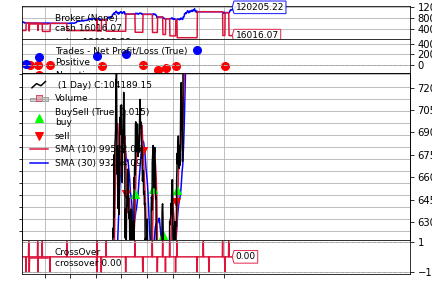

[[<Figure size 432x288 with 5 Axes>]]

In [33]:
from datetime import datetime
import matplotlib.pyplot as plt
import backtrader as bt

# Create a subclass of Strategy to define the indicators and logic

class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed
feed = bt.feeds.PandasData(dataname=ohclData)

cerebro.adddata(feed)  # Add the data feed

cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.run()  # run it all
cerebro.plot()  # and plot it with a single command

In [28]:
def 

  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
